In [3]:
from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt
import pandas as pd
import natasha

import nltk
from nltk.corpus import stopwords
nltk.download("stopwords")
words_pack = stopwords.words("russian")

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\kil4g\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping corpora\stopwords.zip.


In [4]:
words_pack

['и',
 'в',
 'во',
 'не',
 'что',
 'он',
 'на',
 'я',
 'с',
 'со',
 'как',
 'а',
 'то',
 'все',
 'она',
 'так',
 'его',
 'но',
 'да',
 'ты',
 'к',
 'у',
 'же',
 'вы',
 'за',
 'бы',
 'по',
 'только',
 'ее',
 'мне',
 'было',
 'вот',
 'от',
 'меня',
 'еще',
 'нет',
 'о',
 'из',
 'ему',
 'теперь',
 'когда',
 'даже',
 'ну',
 'вдруг',
 'ли',
 'если',
 'уже',
 'или',
 'ни',
 'быть',
 'был',
 'него',
 'до',
 'вас',
 'нибудь',
 'опять',
 'уж',
 'вам',
 'ведь',
 'там',
 'потом',
 'себя',
 'ничего',
 'ей',
 'может',
 'они',
 'тут',
 'где',
 'есть',
 'надо',
 'ней',
 'для',
 'мы',
 'тебя',
 'их',
 'чем',
 'была',
 'сам',
 'чтоб',
 'без',
 'будто',
 'чего',
 'раз',
 'тоже',
 'себе',
 'под',
 'будет',
 'ж',
 'тогда',
 'кто',
 'этот',
 'того',
 'потому',
 'этого',
 'какой',
 'совсем',
 'ним',
 'здесь',
 'этом',
 'один',
 'почти',
 'мой',
 'тем',
 'чтобы',
 'нее',
 'сейчас',
 'были',
 'куда',
 'зачем',
 'всех',
 'никогда',
 'можно',
 'при',
 'наконец',
 'два',
 'об',
 'другой',
 'хоть',
 'после',
 'на

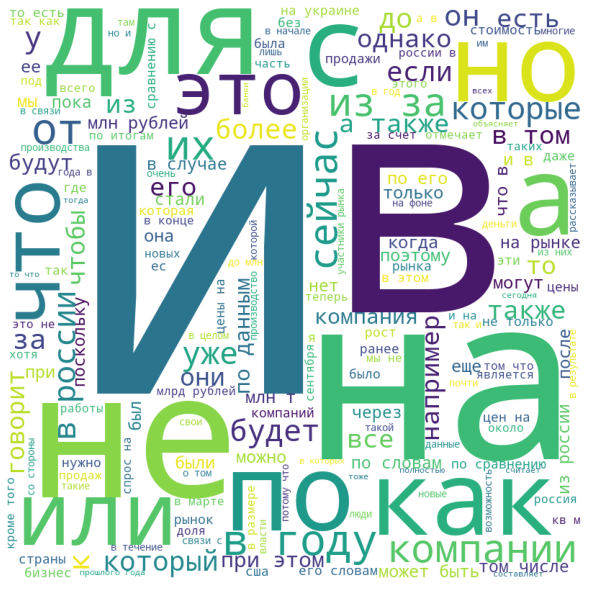

In [1]:
df = pd.read_csv("merged_data.csv", encoding ="utf-8")

comment_words = ''
stopwords = words_pack

# iterate through the csv file
for label, data in df.groupby("category"):



    for j in text:
        set1 += [j]

sp = list(set1)

wordcloud = WordCloud(width = 800, height = 800,
                      background_color ='white',
                      stopwords = stopwords,
                      min_font_size = 10).generate(" ".join(sp))

# plot the WordCloud image
plt.figure(figsize = (8, 8), facecolor = None)
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad = 0)

plt.show()

In [ ]:
from natasha import (
    Segmenter,
    MorphVocab,

    NewsEmbedding,
    NewsMorphTagger,

    Doc
)

In [33]:
stop_pos = {'ADP',
 'ADV',
 'AUX',
 'CCONJ',
 'DET',
 'NUM',
 'PART',
 'PRON',
 'PUNCT',
 'SCONJ',
 'SYM'}


In [ ]:
segmenter = Segmenter()
morph_vocab = MorphVocab()
emb = NewsEmbedding()
morph_tagger = NewsMorphTagger(emb)

for label, data in df.groupby("category"):
    print(label)
    full_text = ' '.join(data["text"].astype(str))
    doc = Doc(full_text)
    doc.segment(segmenter)
    doc.tag_morph(morph_tagger)
    for token in doc.tokens: token.lemmatize(morph_vocab)
    full_cleared_text = ' '.join(token.lemma for token in doc.tokens if token.pos not in stop_pos)
    wordcloud = WordCloud(width = 800, height = 800,
                      background_color ='white',
                      stopwords = words_pack,
                      min_font_size = 10).generate(full_cleared_text)

    # plot the WordCloud image
    plt.figure(figsize = (8, 8), facecolor = None)
    plt.imshow(wordcloud)
    plt.axis("off")
    plt.tight_layout(pad = 0)

    plt.show()

1
